In [2]:
import pandas as pd
import numpy as np

In [3]:
iris=pd.read_csv('/content/iris.csv')

understanding the data

In [4]:
iris.shape

(150, 5)

In [5]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
iris.fillna(iris.select_dtypes(include='number').median(), inplace=True)

In [9]:
iris=iris.fillna(value=0)
iris.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
iris.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

dividing data into features & variables

In [11]:
feature_columns = ['SL', 'SW', 'PL','PW']
X = iris[feature_columns].values
y = iris['Classification'].values

# Alternative way of selecting features and labels arrays:
# X = iris.iloc[:, 1:5]
# y = iris.iloc[:, 5].values

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

fit the model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

testing the KNN algorithn on testing data

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

evaluate the model

In [16]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


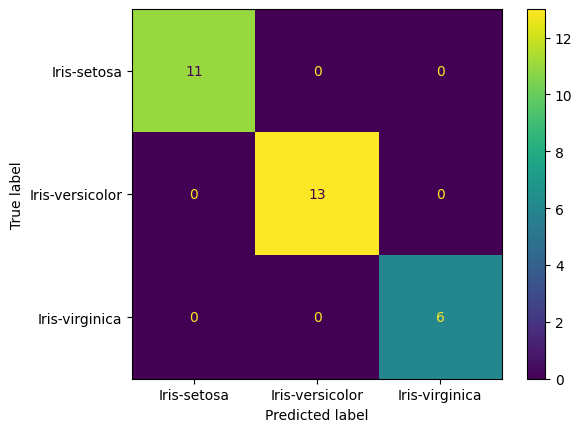

In [17]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

# Calculate the Confusion Matrix:
# calculates the confusion matrix by comparing the
#true labels (y_test) with the predicted labels (y_pred) generated by your classification model.

result=confusion_matrix(y_test,y_pred)
result


#Calculate the Accuracy Score
score=accuracy_score(y_test,y_pred)
score

#Create a Confusion Matrix Display Object:
#using the confusion matrix (result) and specifying the class labels to be displayed on the plot.
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
#Plot the Confusion Matrix
cmd.plot()

Check and handle outliers in at least 3 columns in the dataset

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

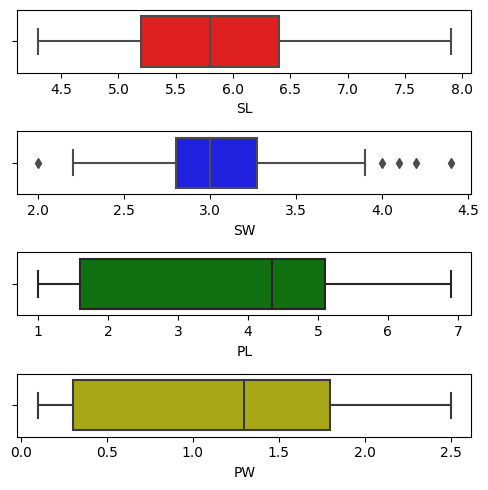

In [19]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(x=iris['SL'], ax = axs[0],color='r')
plt2 = sns.boxplot(x=iris['SW'],ax = axs[1], color='b')
plt3 = sns.boxplot(x=iris['PL'], ax = axs[2],color='g')
plt4 = sns.boxplot(x=iris['PW'], ax = axs[3],color='y')
plt.tight_layout()

SW has outliers closer to upper whisker & below lower whisker

buliding decision tree  model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)

clf=clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


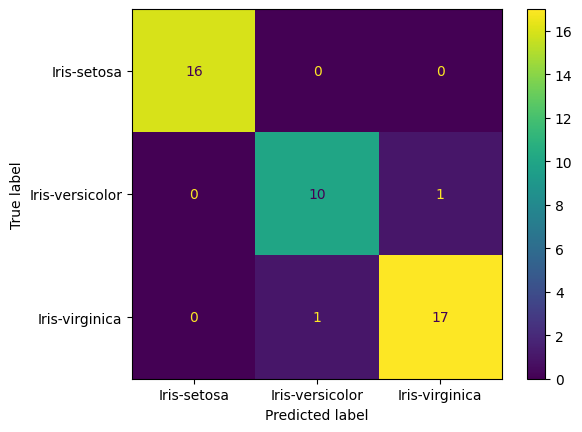

In [55]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']


result=confusion_matrix(y_test,y_pred)
result

score=accuracy_score(y_test,y_pred)
score

cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

Logistic Regression

In [50]:
#Import necessary libraries for Logistic Regression and also evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score

In [25]:
feature_x=['SW','SL','PW','PL']
X=iris[feature_x]
y=iris.Classification

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [61]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)


LogisticRegression(max_iter=1000)

In [59]:
lm=LogisticRegression()
lm.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
X_train.head()

,SW,SL,PW,PL
6,3.4,4.6,0.3,1.4
25,3.0,5.0,0.2,1.6
21,3.7,5.8,0.4,1.5
92,2.6,5.8,1.2,4.0
9,3.1,4.9,0.1,1.5


Support Vector Machine Model of Classification (SVC)

In [29]:
#Import necessary libraries
from sklearn import svm
from sklearn.svm import SVC

In [30]:
#Creating an instance
svm_linear=SVC(kernel='linear')

#Fitting the model
svm_linear.fit(X_train,y_train)

#Predicting
y_pred_svm1=svm_linear.predict(X_test)

In [31]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_svm1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Text(0.5, 23.52222222222222, 'Predicted label')

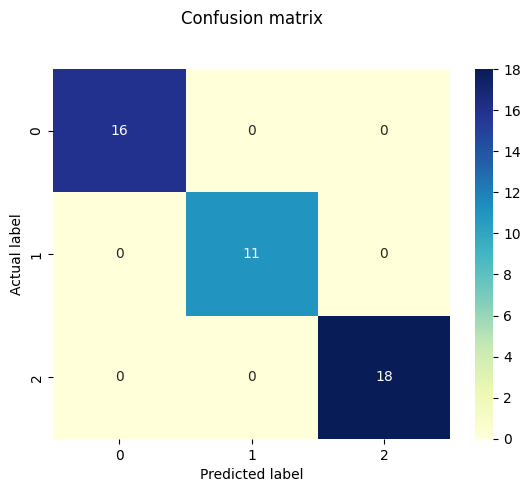

In [32]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm1)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# Accuracy score evaluation

print('The accuracy of Support vector machine using linear kernal is',accuracy_score(y_test,y_pred_svm1))

The accuracy of Support vector machine using linear kernal is 1.0


Random forest classification

In [46]:
feature_x=['SW','SL','PW','PL']
X=iris[feature_x]
y=iris.Classification

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9555555555555556


Conclusion-  KNN algorithm ,Support Vector Machine Model & decision tree model gives the best result than the logistic regression & random forest model